In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
%matplotlib inline

# Henri Langlois

# Dataset

From https://www.kaggle.com/c/titanic.

In [ ]:
data_train = pd.read_csv('/content/train.csv')
N, D = data_train.shape
print(f"There are {N} rows and {D} columns in this csv.")
data_train.head()

There are 891 rows and 12 columns in this csv.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data_test = pd.read_csv('/content/test.csv')
N, D = data_test.shape
print(f"There are {N} rows and {D} columns in this csv.")
data_test.head()

There are 418 rows and 11 columns in this csv.


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
data_train_features = data_train[["Pclass", "Fare", "Sex", "Age", "SibSp", "Embarked"]]
data_train_features.head()

,Pclass,Fare,Sex,Age,SibSp,Embarked
0,3,7.2500,male,22.0,1,S
1,1,71.2833,female,38.0,1,C
2,3,7.9250,female,26.0,0,S
3,1,53.1000,female,35.0,1,S
4,3,8.0500,male,35.0,0,S


# Machine learning

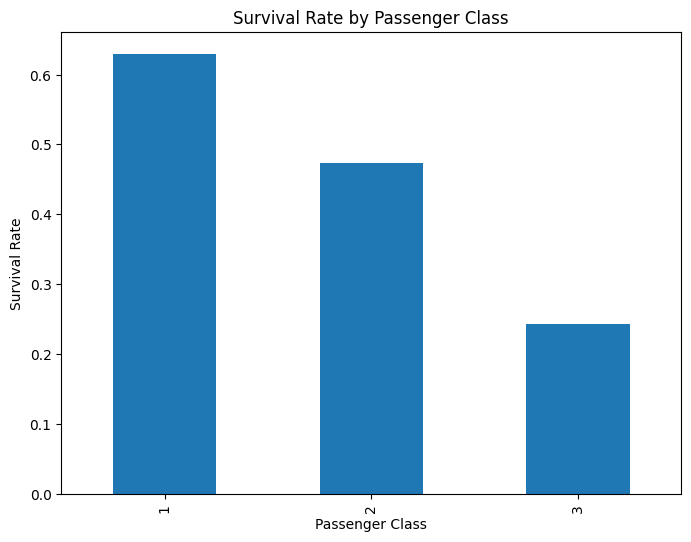

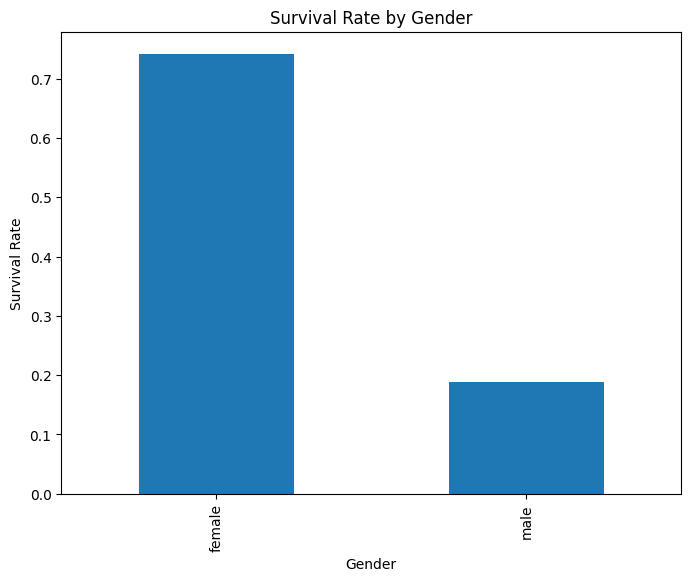

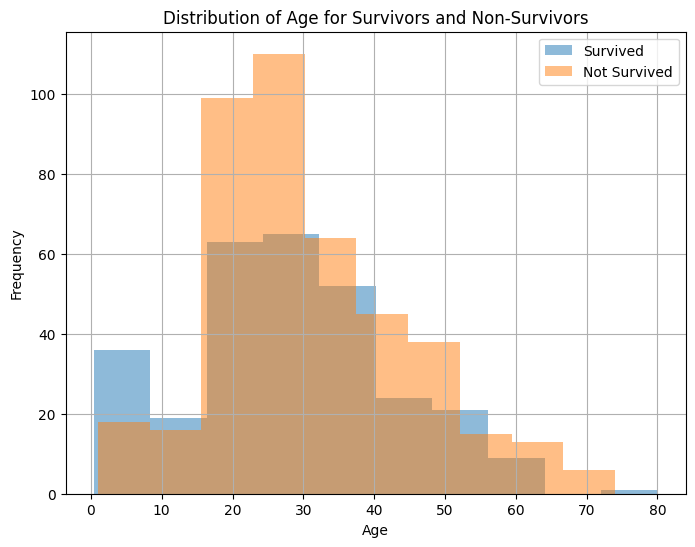

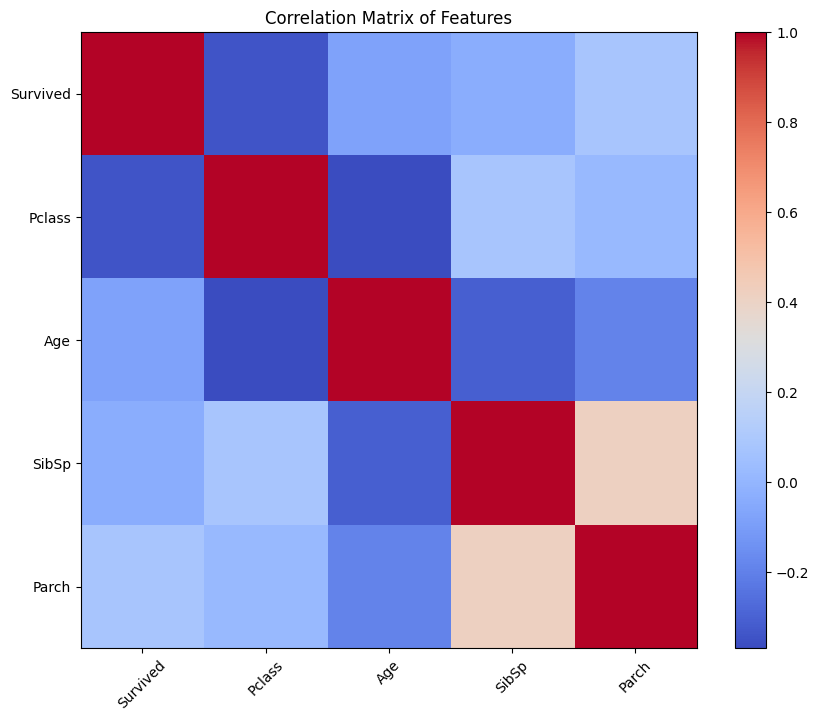

In [ ]:
# Survival rate by passenger class
plt.figure(figsize=(8, 6))
data_train.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# Survival rate by gender
plt.figure(figsize=(8, 6))
data_train.groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

# Distribution of age for survivors and non-survivors
plt.figure(figsize=(8, 6))
data_train[data_train['Survived'] == 1]['Age'].hist(alpha=0.5, label='Survived')
data_train[data_train['Survived'] == 0]['Age'].hist(alpha=0.5, label='Not Survived')
plt.title('Distribution of Age for Survivors and Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Correlation matrix of features
plt.figure(figsize=(10, 8))
correlation_matrix = data_train[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch']].corr()
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
# Convert categorical features to numerical using one-hot encoding
data_train_features = pd.get_dummies(data_train_features, columns=['Sex', 'Embarked'])

# Fill missing values with the mean of that feature
data_train_features = data_train_features.fillna(data_train_features.mean())

# Drop the fare as it seems to be inconsequential
data_train_features = data_train_features.drop('Fare', axis=1)

# Separate features and target variable, generate a NumPy array
X = data_train_features.values
y = data_train['Survived'].values[data_train_features.index]

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model with XGBoost
model = XGBClassifier(max_depth = 3, num_parallel_tree = 25)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=25, random_state=None, ...)

In [ ]:
# Generate some metrics
y_pred = model.predict(X_val)
accuracy = sklearn.metrics.accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.3f}")
recall = sklearn.metrics.recall_score(y_val, y_pred)
print(f"Recall: {recall:.3f}")
precision = sklearn.metrics.precision_score(y_val, y_pred)
print(f"Precision: {precision:.3f}")
f1_score = sklearn.metrics.f1_score(y_val, y_pred)
print(f"F1 Score: {f1_score:.3f}")

# Generate the confusion matrix
cm = confusion_matrix(y_val, y_pred)
print(" \n Confusion Matrix:")
cm = pd.DataFrame(cm, columns=['Predicted Passed', 'Predicted Survived'], index=['Actual Passed', 'Actual Survived'])
print(cm)

Accuracy: 0.832
Recall: 0.743
Precision: 0.833
F1 Score: 0.786
 
 Confusion Matrix:
                 Predicted Passed  Predicted Survived
Actual Passed                  94                  11
Actual Survived                19                  55


In [ ]:
# Prepare the test data in the same way as the training data
data_test_features = data_test[["Pclass", "Fare", "Sex", "Age", "SibSp", "Embarked"]]
data_test_features = pd.get_dummies(data_test_features, columns=['Sex', 'Embarked'])
data_test_features = data_test_features.fillna(data_train_features.mean())
data_test_features = data_test_features.drop('Fare', axis=1)

# Separate features and target variable
X_test = data_test_features.values

# Generate predictions
y_test_pred = model.predict(X_test)
submission = pd.DataFrame({'PassengerId': data_test['PassengerId'], 'Survived': y_test_pred})
submission.to_csv('submission.csv', index=False)

In [ ]:
# We can simply get feature importances from the trained model
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': data_train_features.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
feature_importance_df

,Feature,Importance
3,Sex_female,0.607334
0,Pclass,0.187113
7,Embarked_S,0.061994
2,SibSp,0.055368
5,Embarked_C,0.038258
1,Age,0.032375
6,Embarked_Q,0.017557
4,Sex_male,0.000000


In [ ]:
y_pred_proba = model.predict_proba(X_val)
avg_pred_proba_by_class = []

for i in range(y_pred_proba.shape[1]):
  # Filter the probabilities for the current class
  class_probabilities = y_pred_proba[y_pred == i, i]
  avg_pred_proba = np.mean(class_probabilities)
  avg_pred_proba_by_class.append(avg_pred_proba)

print(f"Average deceased prediction confidence: {avg_pred_proba_by_class[0]:.3f}")
print(f"Average survived prediction confidence: {avg_pred_proba_by_class[1]:.3f}")

Average deceased prediction confidence: 0.832
Average survived prediction confidence: 0.860


In [ ]:
y_pred_proba_passed = y_pred_proba[:, 0]
high_confidence_passed_indices = np.where(y_pred_proba_passed > 0.9)[0]
true_labels_high_confidence_passed = y_val[high_confidence_passed_indices]
num_correct_high_confidence_passed = np.sum(true_labels_high_confidence_passed == 0)
total_passed = np.sum(y_val == 0)
percentage_callable_families = (num_correct_high_confidence_passed / total_passed) * 100

print(f"Number of predictions with a probability over 90% of being deceased: {num_correct_high_confidence_passed}")
print(f"Percentage of deceased passengers' families we can call: {percentage_callable_families:.2f}%")

Number of predictions with a probability over 90% of being deceased: 43
Percentage of deceased passengers' families we can call: 40.95%
